##Load

In [ ]:
!cp -r "/content/drive/MyDrive/splitted" /content/

In [ ]:
data_source = "/content/splitted"


##Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

img_size = (224, 224)
batch_size = 32
num_classes = 10

train_data = os.path.join(data_source, "train")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3356 images belonging to 10 classes.
Found 834 images belonging to 10 classes.


##Train

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

base = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
base.trainable = False

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(num_classes, activation="softmax")(x)

model_mobilenet = models.Model(base.input, output)

model_mobilenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model_mobilenet.fit(train_gen, validation_data=val_gen, epochs=10)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 95s 743ms/step - accuracy: 0.6715 - loss: 1.0300 - val_accuracy: 0.9293 - val_loss: 0.2394
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 483ms/step - accuracy: 0.9652 - loss: 0.1214 - val_accuracy: 0.9137 - val_loss: 0.2550
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 47s 453ms/step - accuracy: 0.9708 - loss: 0.1017 - val_accuracy: 0.9556 - val_loss: 0.1677
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 535ms/step - accuracy: 0.9764 - loss: 0.0785 - val_accuracy: 0.9460 - val_loss: 0.1320
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 55s 522ms/step - accuracy: 0.9824 - loss: 0.0632 - val_accuracy: 0.9472 - val_loss: 0.1746
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 49s 469ms/step - accuracy: 0.9819 - loss: 0.0629 - val_accuracy: 0.9460 - val_loss: 0.1813
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 49s 471ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 0.9448 - val_loss: 0.1570
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 47s 449ms/step - accuracy: 0.9817 - loss: 0

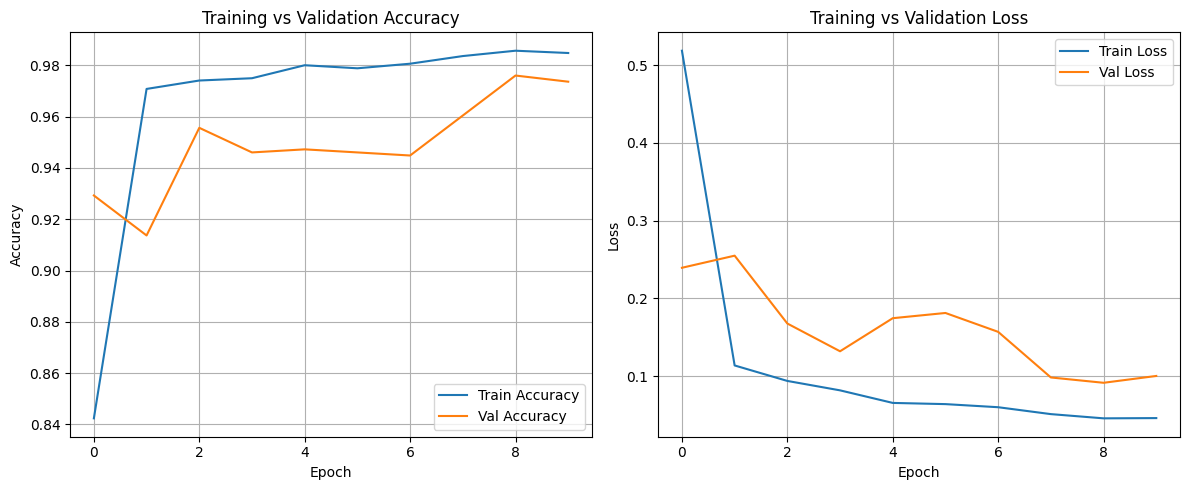

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##evaluation & visualization

In [ ]:
test_data = os.path.join(data_source, "test")

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 1053 images belonging to 10 classes.


In [ ]:
import numpy as np

test_gen.reset()

y_test_prob = model_mobilenet.predict(test_gen, verbose=1)
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_true = test_gen.classes

class_names = list(test_gen.class_indices.keys())
num_classes = len(class_names)


33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 405ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nTest Classification Report:")
print(classification_report(
    y_test_true,
    y_test_pred,
    target_names=class_names,
    digits=4
))


Test Accuracy: 0.9819563152896487

Test Classification Report:
                 precision    recall  f1-score   support

        call_me     1.0000    0.9245    0.9608       106
fingers_crossed     1.0000    0.9604    0.9798       101
           okay     1.0000    0.9907    0.9953       108
          paper     1.0000    1.0000    1.0000       108
          peace     0.9381    1.0000    0.9680       106
           rock     1.0000    1.0000    1.0000       102
        rock_on     1.0000    1.0000    1.0000       107
        scissor     0.9358    0.9623    0.9488       106
         thumbs     0.9558    1.0000    0.9774       108
             up     1.0000    0.9802    0.9900       101

       accuracy                         0.9820      1053
      macro avg     0.9830    0.9818    0.9820      1053
   weighted avg     0.9828    0.9820    0.9820      1053



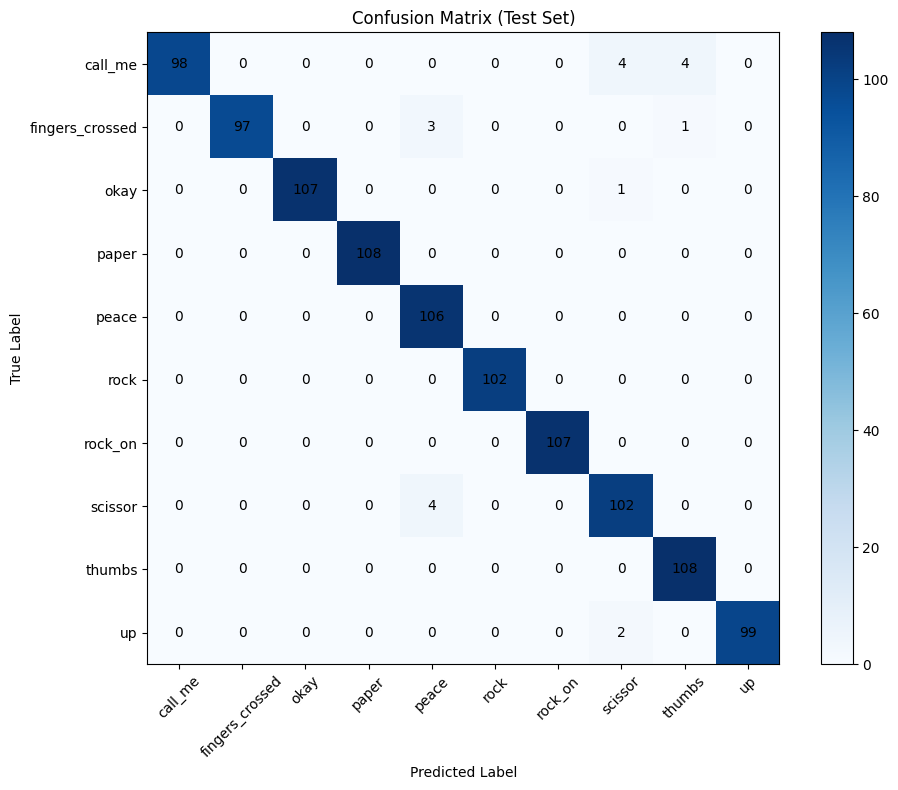

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")   # 🔹 try: "Greens", "Oranges", "Purples"
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.xticks(range(num_classes), class_names, rotation=45)
plt.yticks(range(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


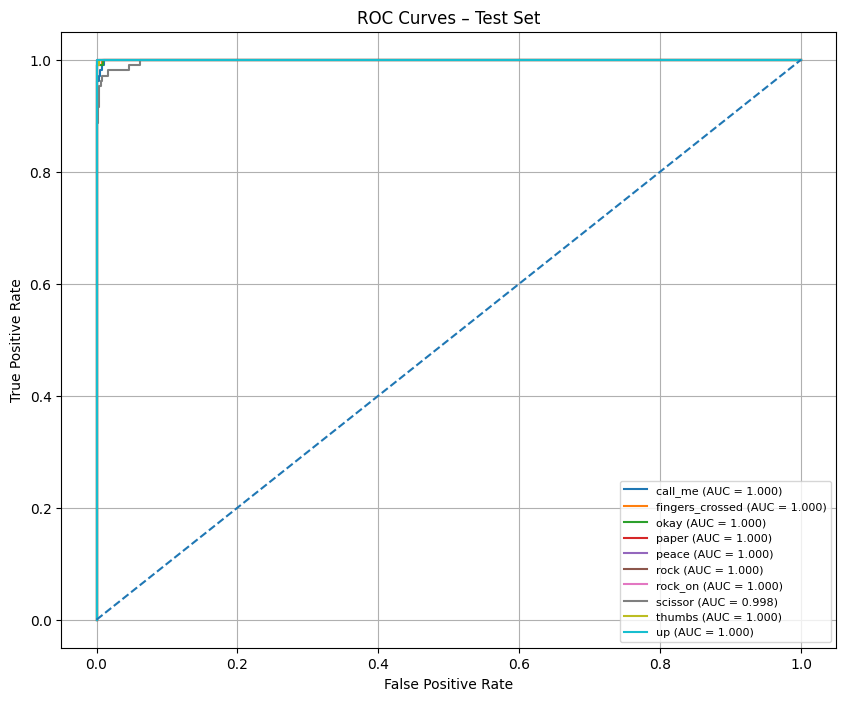

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test_true, classes=range(num_classes))

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Test Set")
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.show()


##Save

In [ ]:
model_mobilenet.save("/content/drive/MyDrive/DL_Colabs/final models/mobilenet_transfer.keras")
